In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data_df = pd.read_csv('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/data.csv').astype(int)
movies_df = pd.read_csv('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/movies.csv')
train_df = pd.read_csv('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/test.csv')

data = data_df.to_numpy()
movies = movies_df.to_numpy()
traindata = train_df.to_numpy().astype(int)
testdata = test_df.to_numpy().astype(int)

print(data.shape)
print(movies.shape)
print(traindata.shape)
print(testdata.shape)

(100000, 3)
(1682, 21)
(90000, 3)
(10000, 3)


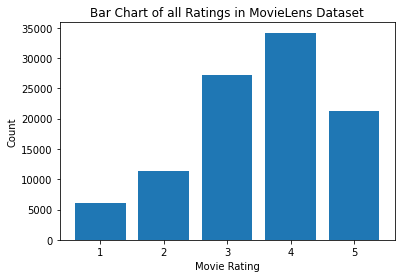

In [ ]:
# basic visualizations 1
ratings = data_df['Rating'].to_numpy().astype(int)
counts, bins = np.histogram(ratings,bins=[1,2,3,4,5,6])
rating_vals = [1,2,3,4,5]
plt.bar(rating_vals,counts)
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.title('Bar Chart of all Ratings in MovieLens Dataset')
plt.savefig("Bar Chart of All Ratings")
plt.show()

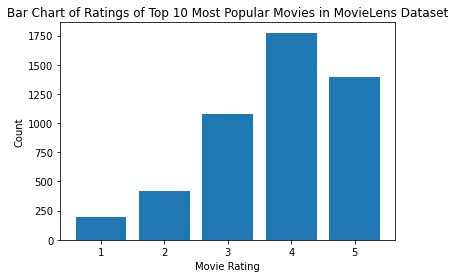

In [ ]:
# basic visualizations 2
d = data_df[['Movie ID', 'Rating']].to_numpy()
counts = np.zeros(5)
most_popular = [50, 258, 100, 181, 294, 286, 288, 1, 300, 121]
for id, rating in d:
    if id in most_popular:
        counts[rating - 1] += 1
plt.bar(rating_vals,counts)
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.title('Bar Chart of Ratings of Top 10 Most Popular Movies in MovieLens Dataset')
plt.savefig("Bar Chart of Top 10 Most Popular Movies Ratings")
plt.show()

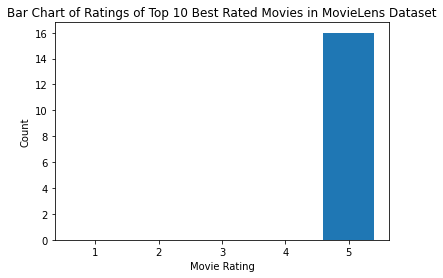

In [ ]:
# basic visualizations 3
d = data_df[['Movie ID', 'Rating']].to_numpy()
counts = np.zeros(5)
best = [814, 1599, 1201, 1122, 1653, 1293, 1500, 1189, 1536, 1467]
for id, rating in d:
    if id in best:
        counts[rating - 1] += 1
plt.bar(rating_vals,counts)
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.title('Bar Chart of Ratings of Top 10 Best Rated Movies in MovieLens Dataset')
plt.savefig("Bar Chart of Top 10 Best Rated Movies Ratings")
plt.show()

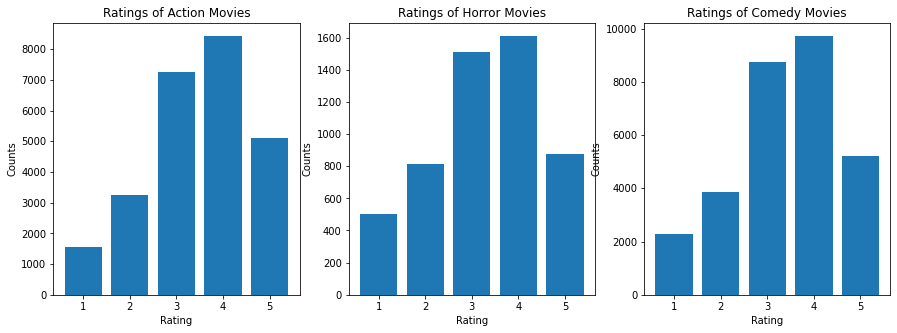

In [ ]:
# basic visualizations 4
genres = ['Action', 'Horror', 'Comedy']
ids1 = []
ids2 = []
ids3 = []
for index, row in movies_df.iterrows():
    if row[genres[0]] == 1:
        ids1.append(row['Movie ID'])
    if row[genres[1]] == 1:
        ids2.append(row['Movie ID'])
    if row[genres[2]] == 1:
        ids3.append(row['Movie ID'])

d = data_df[['Movie ID', 'Rating']].to_numpy()
counts1 = np.zeros(5)
counts2 = np.zeros(5)
counts3 = np.zeros(5)
for id, rating in d:
    if id in ids1:
        counts1[rating - 1] += 1
    if id in ids2:
        counts2[rating - 1] += 1
    if id in ids3:
        counts3[rating - 1] += 1

fig, axs = plt.subplots(1,3,figsize=(15,5))

axs[0].bar(rating_vals,counts1)
axs[1].bar(rating_vals,counts2)
axs[2].bar(rating_vals,counts3)

axs[0].set_xlabel('Rating')
axs[1].set_xlabel('Rating')
axs[2].set_xlabel('Rating')

axs[0].set_ylabel('Counts')
axs[1].set_ylabel('Counts')
axs[2].set_ylabel('Counts')

axs[0].set_title(f'Ratings of {genres[0]} Movies')
axs[1].set_title(f'Ratings of {genres[1]} Movies')
axs[2].set_title(f'Ratings of {genres[2]} Movies')

fig.savefig("Bar Charts of Ratings by Genre")
fig.show()

In [ ]:
from numpy.core.numeric import True_
from operator import truediv
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return eta * (reg * Ui - Vj * (Yij - np.inner(Ui, Vj)))

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return eta * (reg * Vj - Ui * (Yij - np.inner(Ui, Vj)))

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    error = 0.5 * reg * (np.linalg.norm(U,ord='fro') ** 2 + np.linalg.norm(V,ord='fro') ** 2)
    for i, j, Yij in Y:
        error += 0.5 * (Yij - np.inner(U[:,i-1],V[:,j-1])) ** 2
    return error / len(Y)

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    K x M matrix U and K x N matrix V such that rating Y_ij is approximated
    by (U^TV)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    U = np.random.uniform(-0.5, 0.5, (K,M))
    V = np.random.uniform(-0.5, 0.5, (K,N))
    err0 = get_err(U, V, Y, reg=reg)
    errors = np.zeros(max_epochs)

    init_err_reduction = 0

    for epoch in range(max_epochs):
        ids = np.random.permutation(len(Y))
        for idx in ids:
            i, j, Yij = Y[idx]
            i -= 1
            j -= 1

            U[:,i] = U[:,i] - grad_U(U[:,i], Yij, V[:,j], reg, eta)
            V[:,j] = V[:,j] - grad_V(V[:,j], Yij, U[:,i], reg, eta)
        
        errors[epoch] = get_err(U, V, Y, reg=reg)

        if epoch == 0:
           init_err_reduction = np.absolute(errors[epoch] - err0)
        elif (errors[epoch-1] - errors[epoch]) / init_err_reduction <= eps:
            break

    return (U, V, get_err(U, V, Y))

Factorizing with  943  users,  1682  movies.
Training model with M = 943, N = 1682, k = 20, eta = 0.01, reg = 0.0001
Training model with M = 943, N = 1682, k = 20, eta = 0.02, reg = 0.0001
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0001
Training model with M = 943, N = 1682, k = 20, eta = 0.04, reg = 0.0001
Training model with M = 943, N = 1682, k = 20, eta = 0.05, reg = 0.0001
Training model with M = 943, N = 1682, k = 20, eta = 0.06, reg = 0.0001
Training model with M = 943, N = 1682, k = 20, eta = 0.07, reg = 0.0001
Training model with M = 943, N = 1682, k = 20, eta = 0.08, reg = 0.0001
Training model with M = 943, N = 1682, k = 20, eta = 0.09, reg = 0.0001
Training model with M = 943, N = 1682, k = 20, eta = 0.01, reg = 0.001
Training model with M = 943, N = 1682, k = 20, eta = 0.02, reg = 0.001
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.001
Training model with M = 943, N = 1682, k = 20, eta = 0.04, reg = 0.001
Training model with M =

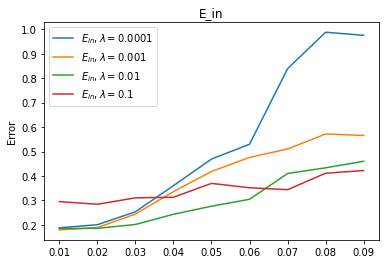

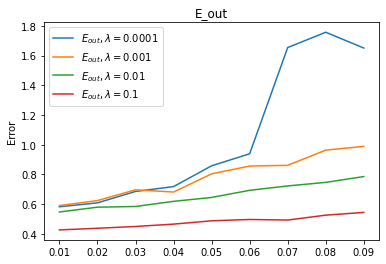

In [ ]:
M = max(max(traindata[:,0]), max(testdata[:,0])).astype(int) # users
N = max(max(traindata[:,1]), max(testdata[:,1])).astype(int) # movies

print("Factorizing with ", M, " users, ", N, " movies.")
K = 20

regs = [10**-4, 10**-3, 10**-2, 10**-1]
etas = [10**-2,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
E_ins = []
E_outs = []

# Use to compute Ein and Eout
for reg in regs:
    E_ins_for_lambda = []
    E_outs_for_lambda = []

    for eta in etas:
        print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, eta, reg))
        U,V, e_in = train_model(M, N, K, eta, reg, traindata)
        E_ins_for_lambda.append(e_in)
        eout = get_err(U, V, testdata)
        E_outs_for_lambda.append(eout)

    E_ins.append(E_ins_for_lambda)
    E_outs.append(E_outs_for_lambda)


# Plot values of E_in across k for each value of lambda
for i in range(len(regs)):
    plt.plot(etas, E_ins[i], label='$E_{in}, \lambda=$'+str(regs[i]))
plt.title('E_in')
plt.ylabel('Error')
plt.legend()
plt.savefig("E_in vs Error")
plt.show()

# Plot values of E_out across k for each value of lambda
for i in range(len(regs)):
    plt.plot(etas, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
plt.title('E_out')
plt.ylabel('Error')
plt.legend()
plt.savefig("E_out vs Error")
plt.show()

From result of previous code cell, we learn that eta of 0.01 and reg of 0.1 lead to the lowest test losses. 

In [ ]:
def visualize(ids, title, V_tilda):
    # do not use for top 10 best movies (num ratings too small)
    # Also movie ids are 1-indexed in the csv but I wrote it for 0-indexed ids

    plt.figure(figsize=(10,10))
    plt.scatter(V_tilda[0][ids], V_tilda[1][ids], s=num_ratings[ids] * 10, c=avg_ratings[ids], cmap=plt.get_cmap('RdYlGn'), alpha=0.6)
    plt.colorbar().set_label("Average rating")
    plt.title(title)
    plt.xlabel('v1')
    plt.ylabel('v2')
    for id, movie_title in movies_df[['Movie ID', 'Movie Title']].values[ids]:
        x, y = V_tilda[0][id-1], V_tilda[1][id-1]
        plt.annotate(movie_title, xy=(x, y), horizontalalignment='center', verticalalignment='center', fontsize=8, rotation=0, arrowprops=dict(arrowstyle='-', lw=1, alpha=0.5))
    plt.savefig(title)
    plt.show()

def visualize_best(best_ids, title, V_tilda):
    plt.figure(figsize=(10,10))
    plt.scatter(V_tilda[0][best_ids], V_tilda[1][best_ids], s=num_ratings[best_ids] * 500, c=avg_ratings[best_ids], cmap=plt.get_cmap('RdYlGn'), alpha=0.6)
    plt.colorbar().set_label("Average rating")
    plt.title(title)
    plt.xlabel('v1')
    plt.ylabel('v2')
    for id, movie_title in movies_df[['Movie ID', 'Movie Title']].values[best_ids]:
        x, y = V_tilda[0][id-1], V_tilda[1][id-1]
        plt.annotate(movie_title, xy=(x, y), horizontalalignment='center', verticalalignment='center', fontsize=8, rotation=0, arrowprops=dict(arrowstyle='-', lw=1, alpha=0.5))
    plt.savefig(title)
    plt.show()

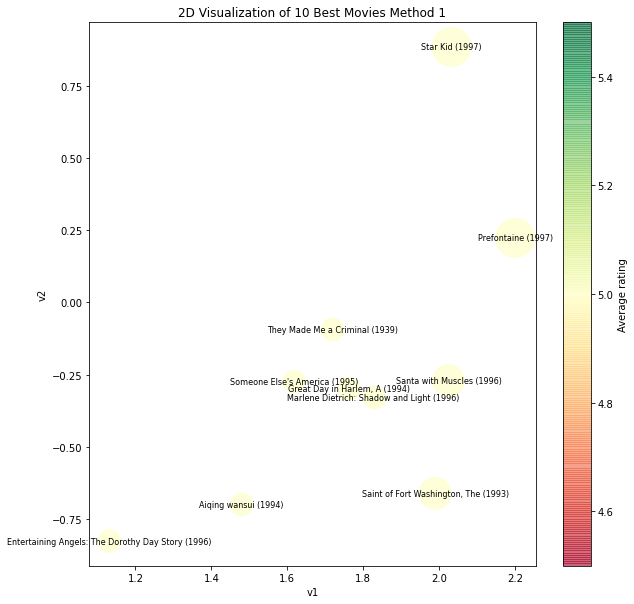

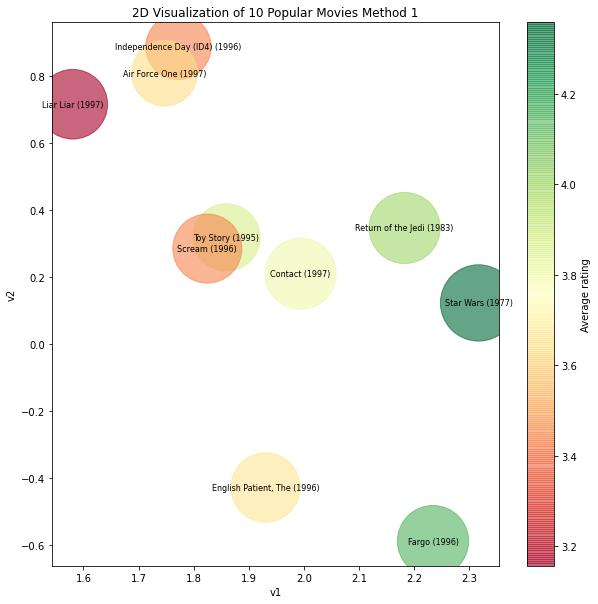

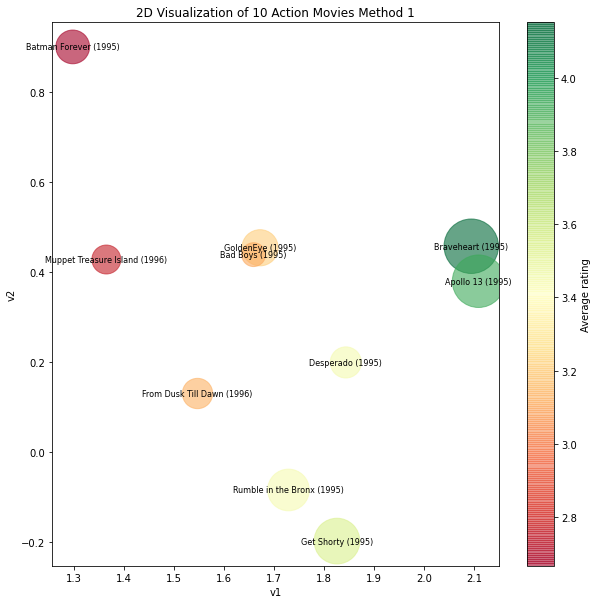

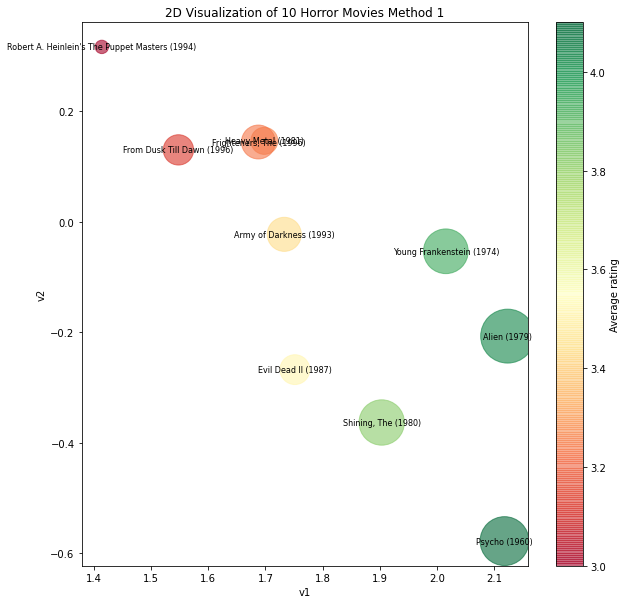

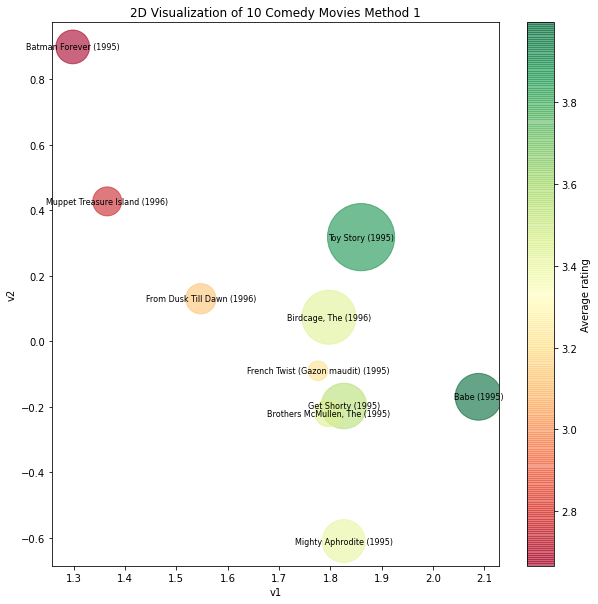

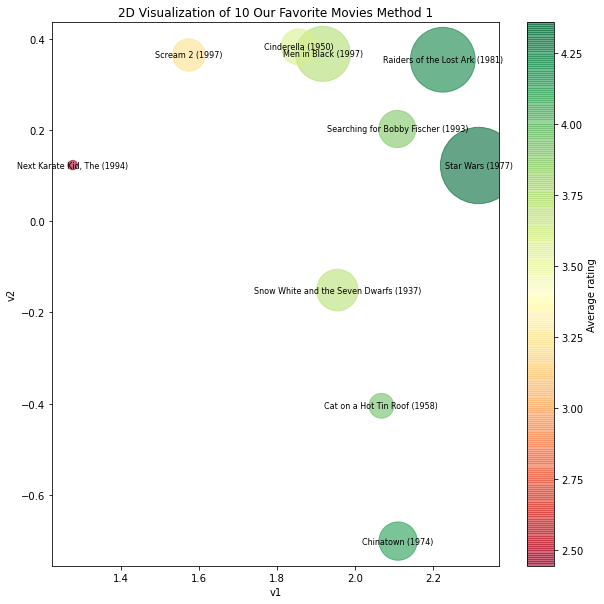

In [ ]:
#-------- Finished Method 1 With all Visualizatioins---------

eta = 0.01
reg = 0.1
M = max(max(traindata[:,0]), max(testdata[:,0])).astype(int) # users
N = max(max(traindata[:,1]), max(testdata[:,1])).astype(int) # movies
K = 20
U, V, ein = train_model(M, N, K, eta, reg, traindata)
eout = get_err(U, V, testdata)

A, sigma, B = np.linalg.svd(V)
U_tilda = np.matmul(np.transpose(A[:,:2]), U)
V_tilda = np.matmul(np.transpose(A[:,:2]), V)

# find total ratings, number of ratings, and average ratings for each movie
total_ratings = np.zeros(N)
num_ratings = np.zeros(N)

for index, row in data_df.iterrows():
    movie_id = row['Movie ID']
    rating = row['Rating']

    num_ratings[movie_id - 1] += 1
    total_ratings[movie_id - 1] += rating

avg_ratings = np.array([total_ratings[i] / num_ratings[i] for i in range(N)])

# ten most popular movies
popular_ids = np.argsort(num_ratings)[-10:]

# ten best movies
best_ids = np.argsort(avg_ratings)[-10:]


action_movies = movies_df[['Movie ID', 'Movie Title', 'Action']]
action_ids = action_movies[action_movies['Action'] == 1][:10]['Movie ID']

horror_movies = movies_df[['Movie ID', 'Movie Title', 'Horror']]
horror_ids = horror_movies[horror_movies['Horror'] == 1][:10]['Movie ID']

comedy_movies = movies_df[['Movie ID', 'Movie Title', 'Comedy']]
comedy_ids = comedy_movies[comedy_movies['Comedy'] == 1][:10]['Movie ID']

favorite_movies = [49,86,98,173,256,417,498,653,894,1414]

# visualize(action_ids, '2D Visualization of 10 Action Movies Method 1', V_tilda)
visualize_best(best_ids, '2D Visualization of 10 Best Movies Method 1', V_tilda)
visualize(popular_ids, '2D Visualization of 10 Popular Movies Method 1', V_tilda)
visualize(action_ids - 1, '2D Visualization of 10 Action Movies Method 1', V_tilda)
visualize(horror_ids - 1, '2D Visualization of 10 Horror Movies Method 1', V_tilda)
visualize(comedy_ids - 1, '2D Visualization of 10 Comedy Movies Method 1', V_tilda)
visualize(favorite_movies, '2D Visualization of 10 Our Favorite Movies Method 1', V_tilda)

In [ ]:
# run pip install once then comment out
#! pip install scikit-surprise

# use this for method 2 as well, j set bias parameter to false
# ! pip install scikit-surprise
# from surprise import SVD
# from surprise import Dataset
# from surprise import Reader
# from surprise.model_selection import cross_validate
# from surprise.model_selection import GridSearchCV

# reader = Reader(rating_scale=(1, 5))
# train_data = Dataset.load_from_df(train_df, reader)

# # Use the famous SVD algorithm.
# algo = SVD(n_factors=20,n_epochs=100,biased=False)

# # # Run 5-fold cross-validation and print results.
# cross_validate(algo, train_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
# # ! pip install scikit-surprise
# from surprise import SVD
# from surprise import Dataset
# from surprise import Reader
# from surprise.model_selection import cross_validate
# from surprise.model_selection import GridSearchCV

reader = Reader(rating_scale=(1, 5))
train_data = Dataset.load_from_df(data_df, reader)

param_grid = {'n_epochs': [100], 
               'lr_all': [10**-3,10**-2,0.03,0.05,0.07,0.09],
               'reg_all': [10**-4, 10**-3, 10**-2, 10**-1],
               'n_factors':[20],
               'biased':[True]
               }
gs = GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=5)

gs.fit(train_data)

# # best RMSE score
print(gs.best_score['rmse'])

# # combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9171695144314128
{'n_epochs': 100, 'lr_all': 0.01, 'reg_all': 0.1, 'n_factors': 20, 'biased': True}


In [ ]:
test_data = Dataset.load_from_df(test_df, reader)
test = test_data.build_full_trainset().all_ratings()
algo = SVD(n_epochs=100,n_factors=20,lr_all=0.01,reg_all=0.1,init_std_dev=1,biased=False)
algo.fit(train_data.build_full_trainset())
preds = algo.test(test)
accuracy.rmse(preds,verbose=True)

RMSE: 1.4353


1.4352935216004818

In [ ]:
# print(algo.pu.shape)
# print(algo.qi.shape)

In [ ]:
# algo.qi.shape (V) = (1652, 20) despite being 1682 movies 
# Attempt to find V_tilda using V from matrix factorization
# print(algo.pu.shape)
# print(algo.qi.shape)
# U_m3 = algo.pu
# V_m3 = algo.qi
# A, sigma, B = np.linalg.svd(V_m3)
# U_tilda_m3 = np.matmul(np.transpose(A[:,:2]), U_m3)
# V_tilda_m3 = np.matmul(np.transpose(A[:,:2]), V_m3)
# visualize(popular_ids, 'Surpirise SVD Popular Movies', V_tilda_m3)

In [ ]:
# algo = SVD(n_epochs=100,n_factors=20,lr_all=0.01,reg_all=0.1,init_std_dev=1)
# cross_validate(algo, train_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
# print(algo.qi.shape)
# print(algo.pu.shape)

(1682, 20)
(943, 20)


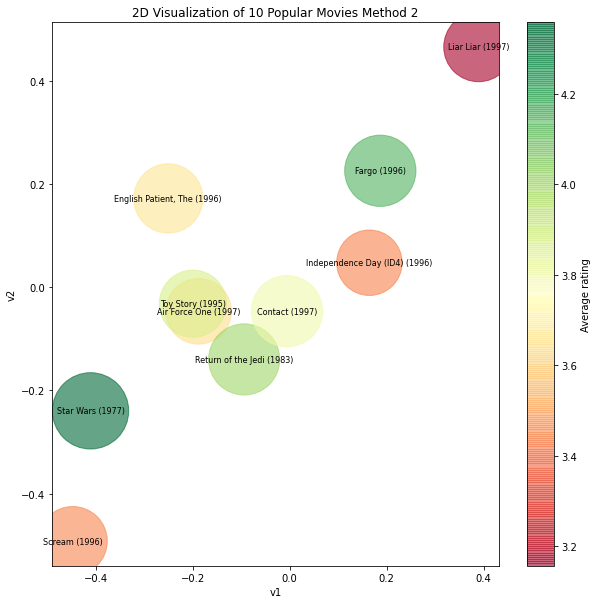

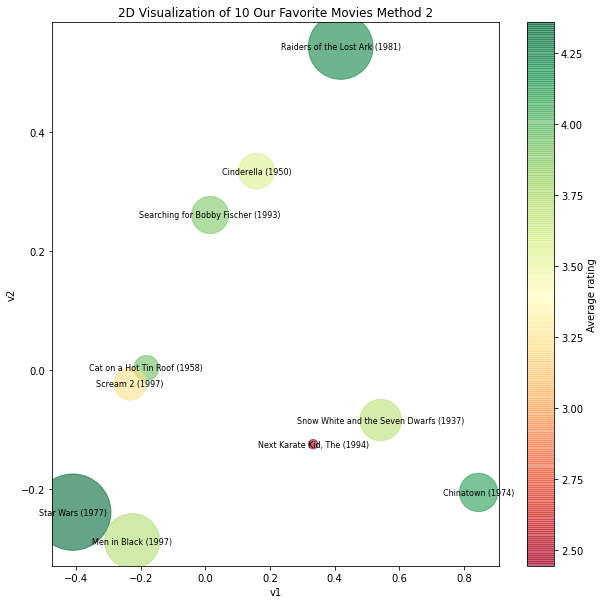

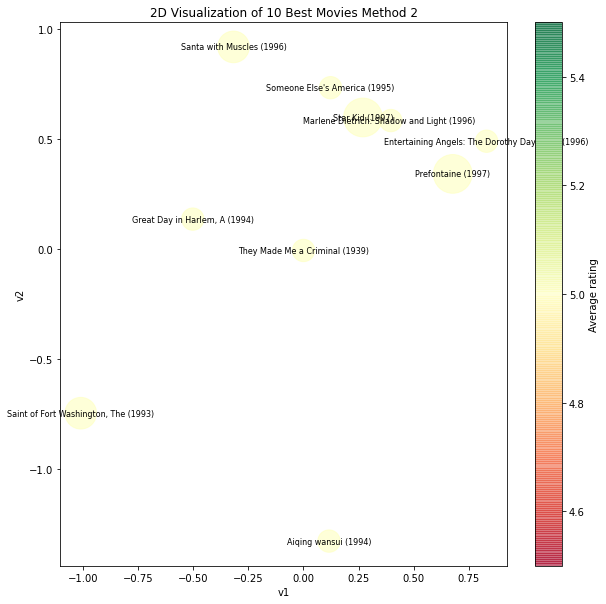

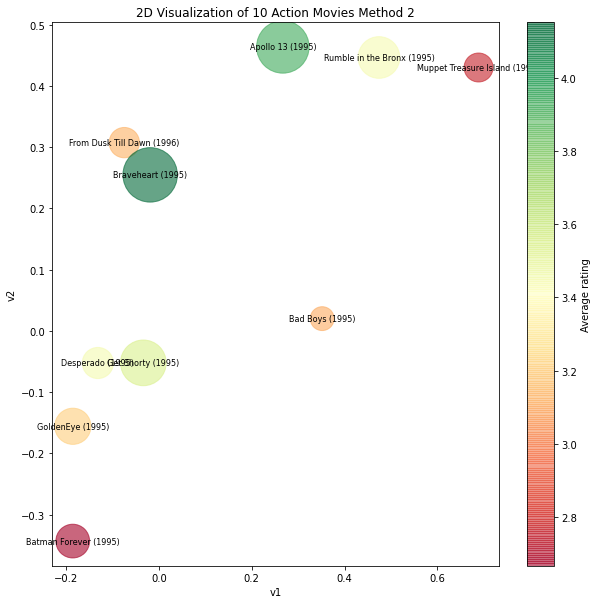

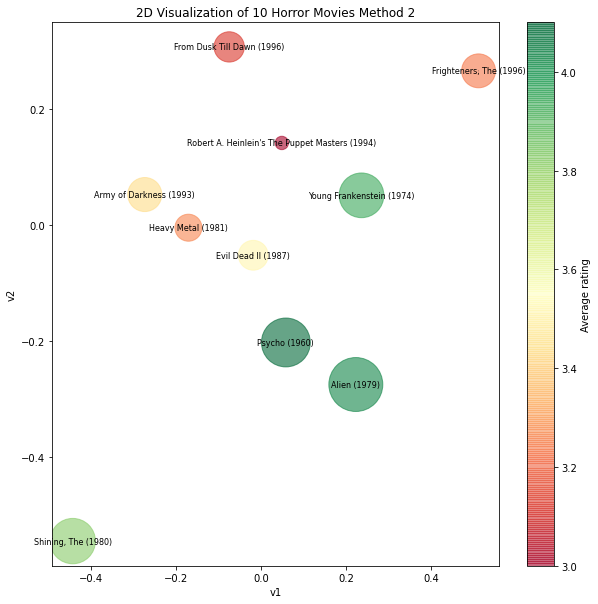

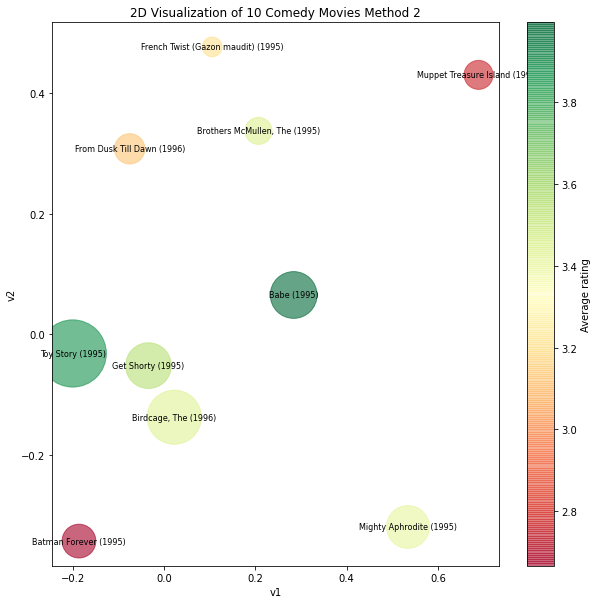

In [ ]:
#-------- Finished Method 2 With all Visualizations---------

#! pip install scikit-surprise
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale=(1, 5))
loaded_data = Dataset.load_from_df(data_df, reader)

trainset = loaded_data.build_full_trainset()
# trainset, testset = train_test_split(loaded_data, test_size=0.1)

# We'll use the famous SVD algorithm.
algo2 = SVD(n_epochs=100,n_factors=20,lr_all=0.01,reg_all=0.1,init_std_dev=1)

# Train the algorithm on the trainset, and predict ratings for the testset
algo2.fit(trainset)
# cross_validate(algo, loaded_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print(algo2.qi.shape)
print(algo2.pu.shape)

U_m2 = np.transpose(algo2.pu)
V_m2 = np.transpose(algo2.qi)
A, sigma, B = np.linalg.svd(V_m2)
# print(A.shape)
U_tilda_m2 = np.matmul(np.transpose(A[:,:2]), U_m2)
V_tilda_m2 = np.matmul(np.transpose(A[:,:2]), V_m2)
visualize(popular_ids, '2D Visualization of 10 Popular Movies Method 2', V_tilda_m2)
visualize(favorite_movies, '2D Visualization of 10 Our Favorite Movies Method 2', V_tilda_m2)
visualize_best(best_ids, '2D Visualization of 10 Best Movies Method 2', V_tilda_m2)
visualize(action_ids - 1, '2D Visualization of 10 Action Movies Method 2', V_tilda_m2)
visualize(horror_ids - 1, '2D Visualization of 10 Horror Movies Method 2', V_tilda_m2)
visualize(comedy_ids - 1, '2D Visualization of 10 Comedy Movies Method 2', V_tilda_m2)

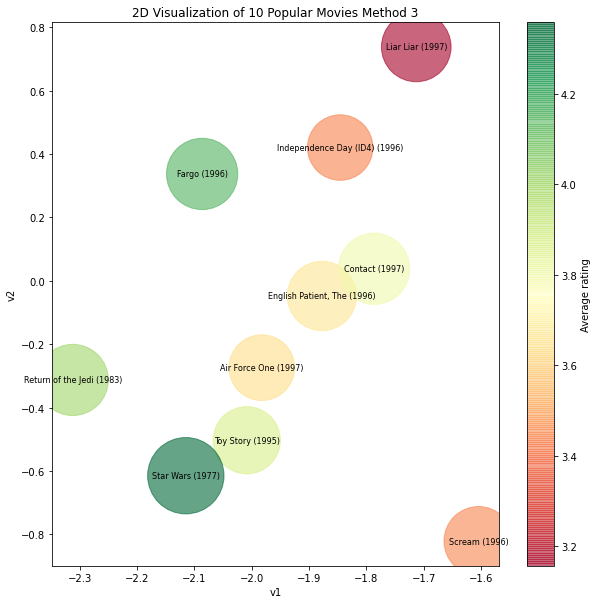

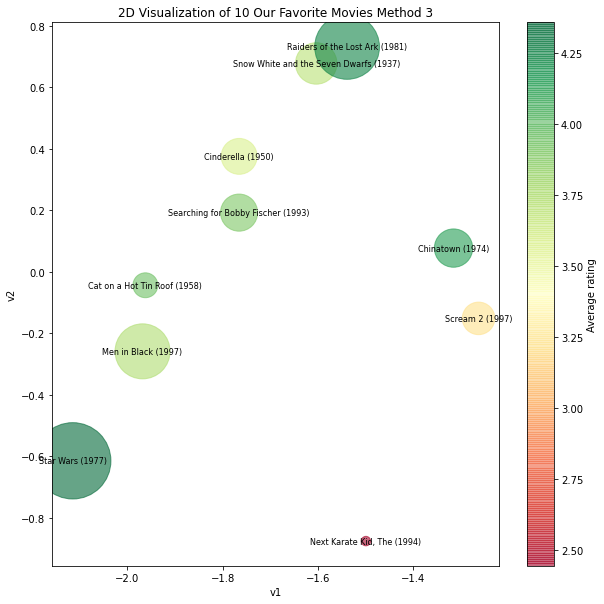

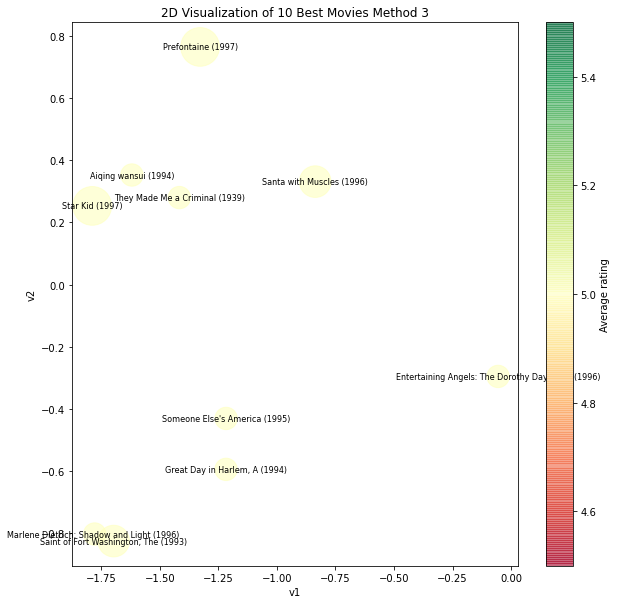

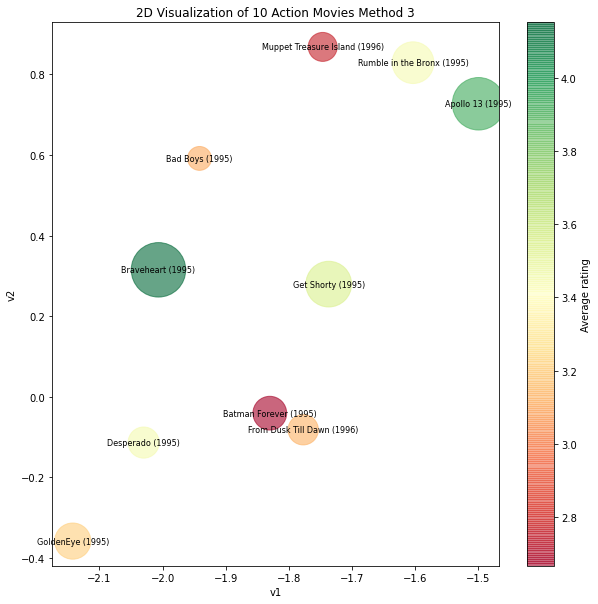

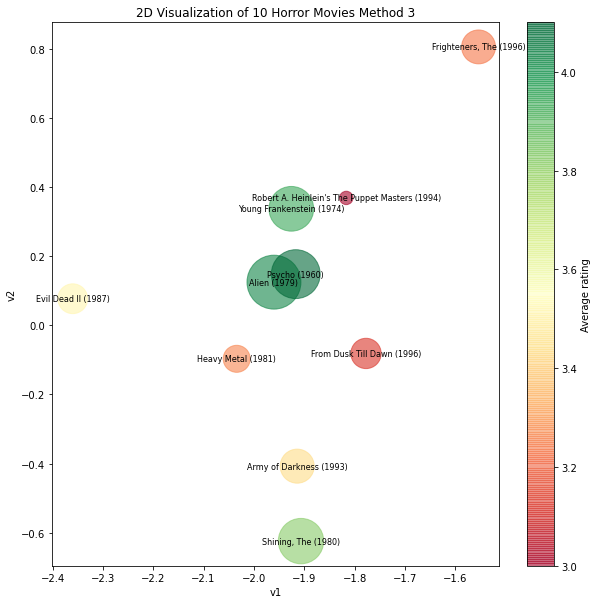

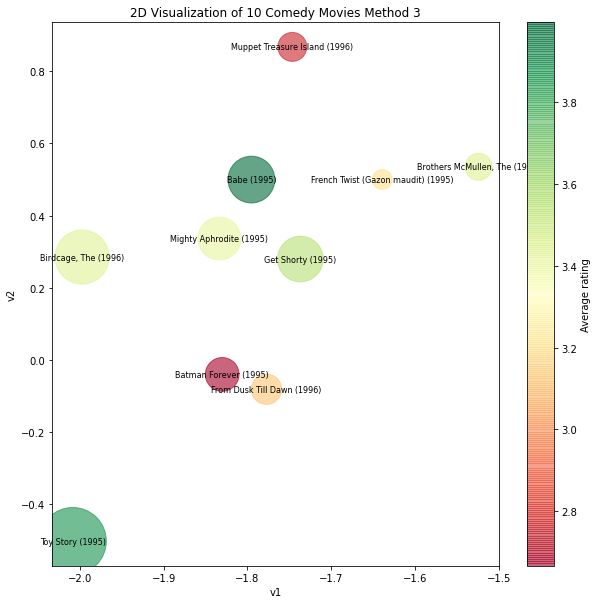

In [ ]:
#-------- Finished Method 3 With all Visualizatioins---------

# ! pip install scikit-surprise
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale=(1, 5))
loaded_data = Dataset.load_from_df(data_df, reader)
trainset = loaded_data.build_full_trainset()

# We'll use the famous SVD algorithm.
algo3 = SVD(n_epochs=100,n_factors=20,lr_all=0.01,reg_all=0.1,init_std_dev=1, biased=False)

# Train the algorithm on the trainset, and predict ratings for the testset
#algo.fit(data)
algo3.fit(trainset)

# print(algo3.qi.shape)
# print(algo3.pu.shape)

U_m3 = np.transpose(algo3.pu)
V_m3 = np.transpose(algo3.qi)
A, sigma, B = np.linalg.svd(V_m3)
# print(A.shape)
U_tilda_m3 = np.matmul(np.transpose(A[:,:2]), U_m3)
V_tilda_m3 = np.matmul(np.transpose(A[:,:2]), V_m3)
visualize(popular_ids, '2D Visualization of 10 Popular Movies Method 3', V_tilda_m3)
visualize(favorite_movies, '2D Visualization of 10 Our Favorite Movies Method 3', V_tilda_m3)
visualize_best(best_ids, '2D Visualization of 10 Best Movies Method 3', V_tilda_m3)
visualize(action_ids - 1, '2D Visualization of 10 Action Movies Method 3', V_tilda_m3)
visualize(horror_ids - 1, '2D Visualization of 10 Horror Movies Method 3', V_tilda_m3)
visualize(comedy_ids - 1, '2D Visualization of 10 Comedy Movies Method 3', V_tilda_m3)

In [ ]:
# comparing all 3 methods

test_err1 = get_err(U, V, testdata)
test_data = Dataset.load_from_df(test_df, reader)
test = test_data.build_full_trainset().all_ratings()
print(test_err1)
preds2 = algo2.test(test)
accuracy.rmse(preds2,verbose=True)
test_data = Dataset.load_from_df(test_df, reader)
test = test_data.build_full_trainset().all_ratings()
preds3 = algo3.test(test)
accuracy.rmse(preds3,verbose=True)

0.4289373156356844
RMSE: 1.3288
RMSE: 1.4303


1.430283735370212